In [3]:
# Install dependencies
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
# import dependencies
from fastbook import *
from fastai.vision.widgets import *

     |████████████████████████████████| 727kB 8.0MB/s 
     |████████████████████████████████| 51kB 9.3MB/s 
     |████████████████████████████████| 194kB 16.2MB/s 
     |████████████████████████████████| 1.2MB 20.9MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 
Mounted at /content/gdrive


In [4]:
# Set AZURE key
key = os.environ.get('AZURE_SEARCH_KEY', '7cbe9073f92046f8a3e6966ff87fd928')

In [18]:
# Download images
instrument_types = 'guitar','violin','sitar'
path = Path('instruments')
if not path.exists():
    path.mkdir()
for o in instrument_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key, f'{o}')
    download_images(dest, urls=results.attrgot('contentUrl'))

In [19]:
# Smoke test
fns = get_image_files(path)
fns

(#414) [Path('instruments/sitar/00000032.jpg'),Path('instruments/sitar/00000115.jpg'),Path('instruments/sitar/00000000.jpg'),Path('instruments/sitar/00000025.png'),Path('instruments/sitar/00000061.jpg'),Path('instruments/sitar/00000036.jpg'),Path('instruments/sitar/00000079.jpg'),Path('instruments/sitar/00000054.jpg'),Path('instruments/sitar/00000082.jpg'),Path('instruments/sitar/00000130.jpg')...]

In [21]:
# Remove failed images
failed = verify_images(fns)
failed.map(Path.unlink);

In [24]:
# Create DataLoaders
instruments = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))
dls = instruments.dataloaders(path)

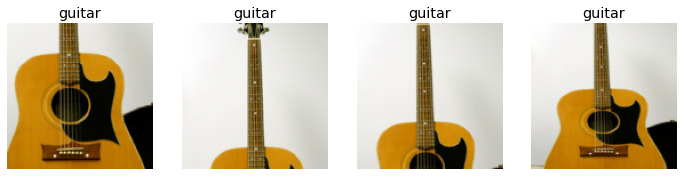

In [30]:
# Augment data
instruments = instruments.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls.train.show_batch(max_n=4, nrows=1, unique=True)
dls = instruments.dataloaders(path)

In [32]:
# Create a Learner and fine-tune (transfer-learning)
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency e

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


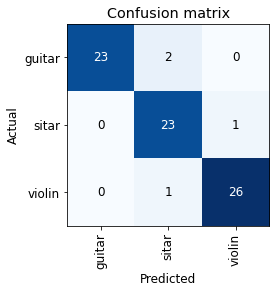

In [33]:
# Plot the Confusion Matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [34]:
# Cleanup using ImageClassifierCleaner
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [35]:
# Move/Delete incorrect images
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [36]:
# Train again
dls = instruments.dataloaders(path)
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency e

In [43]:
# Export model
learn.export(fname='instrument_classifier.pkl')
path = Path()
path.ls(file_exts='.pkl')

(#3) [Path('test.pkl'),Path('instrument_classifier.pkl'),Path('export.pkl')]

In [44]:
# Download the model
from google.colab import files
files.download(path/'instrument_classifier.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
learn_inf = load_learner(path/'instrument_classifier.pkl')